# Plotting and Mapping: to visualize the spatial and data distribution

Important note: Alldata refers to cleaned up data from Einarsson_DAnalysis_Prelim_895Project
This includes all environmental variables, geographical information, and the variable to be predicted, ratio of dinoflaggellates/diatoms.

In [ ]:
#Import packages needed to run code
import matplotlib.pyplot as plt #v3.1.3
import matplotlib.cm as cm
import numpy as np #v1.18.1
import pandas as pd #v1.0.1
import seaborn as sns #v0.10.0
from windrose import WindroseAxes #v1.6.7
import cmocean #v2.0
import netCDF4 as nc #v1.5.3
from netCDF4 import Dataset as NetCDFFile
import cartopy as cp #v0.16.0
import cartopy.crs as ccrs 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io import shapereader

In [13]:
#Following etopo usage suggested by Corday in class

# read in bathymetry file (netCDF) to make maps

#https://maps.ngdc.noaa.gov/viewers/wcs-client/

infile = 'etopo1_bedrock_BeaufortSea_1.nc'
bathy_df = nc.Dataset(infile)
blat = bathy_df.variables['lat'][:]
blon = bathy_df.variables['lon'][:]
bathy = bathy_df.variables['Band1'][:]

#create array of bathymetry data covering the lat/lon of my study area
bx, by = np.meshgrid(blon, blat)
bathy_df.close()

In [19]:
#Read in data file cleaned up in Einarsson_DAnalysis_Prelim_895Project
infile = 'Alldata.csv'
Alldata = pd.read_csv(infile, sep = (','))
#list(DataSatallite.columns)
Alldata.head()

,Unnamed: 0,Cruise Name,Sample #,Date,Time GMT,Station Number,LabelC,Description,Description_label,DateTime,...,Turbidity(RFU),Depth(m),Temp(C),WDIR,WSPD,ATMP,WTMP,Salinity (PSU),Ratio,Ratio.1
0,0,R/V Sikuliaq,1,8/29/2017,6:40,1,Test,Test Station,Test St.,8/29/2017 6:40,...,17.423257,11.334113,6.057174,339.5,9.50,4.200,4.95,26.6,185.309955,185.309955
1,1,R/V Sikuliaq,3,8/30/2017,18:26,5,2A,WPNT 2.2 A,2.2,8/30/2017 18:26,...,14.778982,11.300145,5.850963,86.0,15.30,3.675,3.90,27.8,10.219107,10.219107
2,2,R/V Sikuliaq,5,8/30/2017,19:59,7,2A,WPNT 2.4 A,2.4,8/30/2017 19:59,...,16.165439,11.294035,5.733805,88.6,15.80,3.460,3.90,28.3,165.614004,165.614004
3,3,R/V Sikuliaq,7,8/30/2017,23:22,9,2A,WPNT 2.6 A,2.6,8/30/2017 23:22,...,16.616810,11.294426,5.733710,84.6,16.48,2.900,3.90,28.7,49.248689,49.248689
4,4,R/V Sikuliaq,9,8/30/2017,1:30,11,2A,WPNT 2.8 A,2.8,8/30/2017 1:30,...,15.506794,11.300834,5.887717,292.0,8.00,3.460,4.72,29.5,12.985866,12.985866


In [15]:
#Read in the SST and salinity data obtained from NASA remote sensing satallites
infile = 'Alldata_withSSTSSSsatallite.csv'
DataSatallite = pd.read_csv(infile, sep = (','))
#list(DataSatallite.columns)
DataSatallite.head()

,Cruise Name,Sample #,Station Number,Description,WDIR,WSPD,ATMP,WTMP,DateTime,YearDay,Datenum,SST,SSS,Latitude,Longitude,Ratio
0,R/V Sikuliaq,1,1,Test Station,339.5,9.50,4.200,4.95,8/29/2017 6:40,241,736936.277778,4.59,27.45,71.703849,-153.220997,185.309955
1,R/V Sikuliaq,3,5,WPNT 2.2 A,86.0,15.30,3.675,3.90,8/30/2017 18:26,242,736937.768056,5.38,27.53,71.409738,-151.010023,10.219107
2,R/V Sikuliaq,9,11,WPNT 2.8 A,292.0,8.00,3.460,4.72,8/30/2017 1:30,242,736937.062500,2.69,28.20,71.153532,-151.176501,12.985866
3,R/V Sikuliaq,29,46,WPNT 2.10 B,78.0,6.76,3.160,3.60,9/2/2017 11:47,245,736940.490972,2.11,29.25,71.060674,-151.256842,5.377660
4,R/V Sikuliaq,41,72,WPNT 2.2 D,104.4,12.78,4.080,2.92,9/4/2017 14:41,247,736942.611806,2.29,27.60,71.425571,-151.019276,2.978463


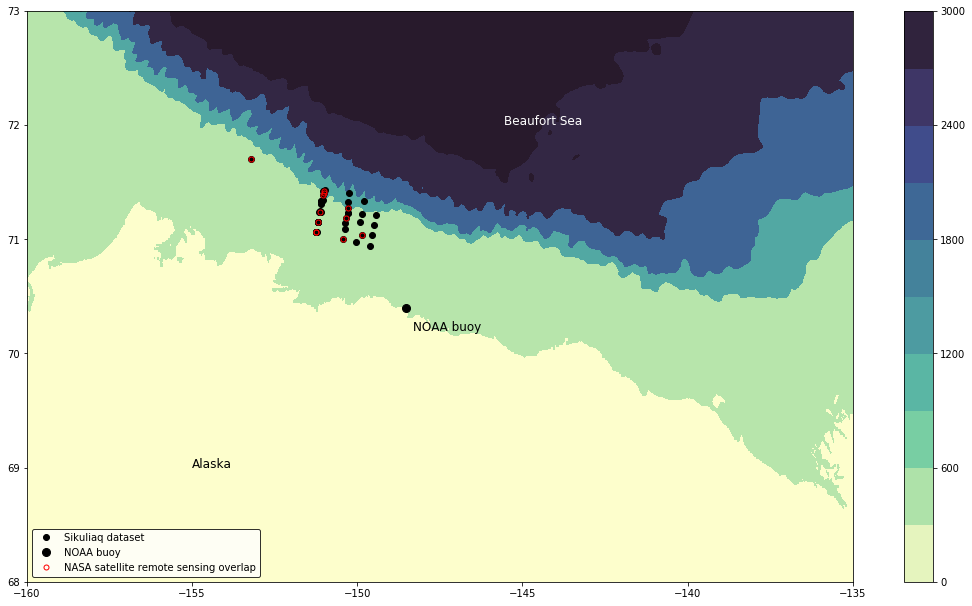

In [16]:
#Zoom in on map to look closer at the coverage of my dataset
#Using 
fig = plt.figure(figsize=(8, 6), edgecolor='w')
palette = 'cmo.deep'
#Choose min and max for depth contour
vmin = 0
vmax = 3000
#Plot contour plot based on etopo data imported and xlim/ylim for looking at the study area
#Assign color and plot legend for topography
plt.contourf(bx, by, -bathy,zorder = -1, cmap = palette, vmin = vmin, vmax = vmax)
plt.xlim(-160,-135)
plt.ylim(68,73)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
m = plt.cm.ScalarMappable(cmap=palette)
m.set_array(bathy)
m.set_clim(vmin, vmax)
cb = plt.colorbar(m, boundaries=np.linspace(vmin, vmax, 11))
#Plot sample sites, as well as overlaping satalite data. Graph geography for spatial orientation
plt.plot(Alldata.Longitude,Alldata.Latitude, 'ok', markersize=6)
plt.plot(-148.52,70.4,'ok',markersize=8)
plt.text(-148.52+0.2,70.4-0.2, 'NOAA buoy', fontsize=12,color='k')
plt.text(-145.5685, 72, 'Beaufort Sea', fontsize=12,color='w')
plt.text(-155, 69, 'Alaska', fontsize=12,color='k')
plt.plot(DataSatallite.Longitude,DataSatallite.Latitude,'o', ms=5, markerfacecolor="None", markeredgecolor='red', markeredgewidth=1)
plt.legend(('Sikuliaq dataset','NOAA buoy','NASA satellite remote sensing overlap'), edgecolor='k',loc='lower left')

The following code is partially taken from matplotlib.org: https://matplotlib.org/3.2.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

I use it to plot multiple y axis on one plot to take a look at the variables that I have along with my own data.

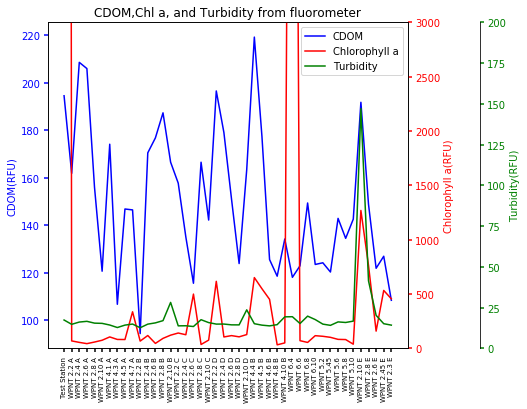

In [17]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)



fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
#Adjust figure size
fig.set_figheight(6)
fig.set_figwidth(8)
par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.2))
#make spine connecting axis invisible
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
#Plot each variable on it's own axis
p1, = host.plot(Alldata['Description'], Alldata['CDOM(RFU)'], "b-", label="CDOM")
p2, = par1.plot(Alldata['Description'], Alldata['Chlorophyll_a(RFU)'], "r-", label="Chlorophyll a")
p3, = par2.plot(Alldata['Description'], Alldata['Turbidity(RFU)'], "g-", label="Turbidity")
#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
par1.set_ylim(0, 3000)
par2.set_ylim(0, 200)
#host.set_xlabel("Waypoint")
host.set_ylabel("CDOM(RFU)")
par1.set_ylabel("Chlorophyll a(RFU)")
par2.set_ylabel("Turbidity(RFU)")
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x',labelrotation=90,labelsize=7, **tkw)
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines])
host.title.set_text("CDOM,Chl a, and Turbidity from fluorometer")
plt.show()

Text(0.05, 0.45, '2A = red\n2B = blue\n2C = black\n2D = pink\n2E = green\n4A = purple\n4B = yellow\n6A = orange\nTest = brown\n5A = brown')

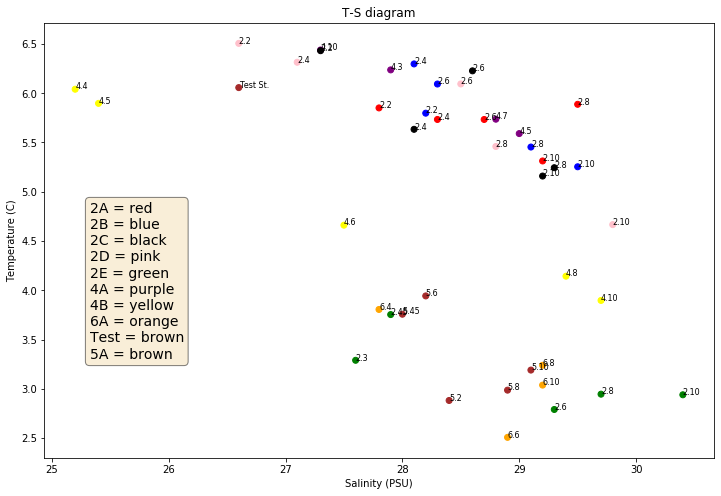

In [27]:
#Plot a T-S scatter plot
plt.figure(figsize=(12, 8), edgecolor='w')
color_dict = { '2A':'red', '2B':'blue', '2C':'black','2D':'pink', '2E':'green','4A':'purple','4B':'yellow','6A':'orange','Test':'brown','5A':'brown'}
plt.scatter(Alldata['Salinity (PSU)'],Alldata['Temp(C)'],color=[ color_dict[i] for i in Alldata['LabelC'] ])
plt.xlabel('Salinity (PSU)')
plt.ylabel('Temperature (C)')
plt.title('T-S diagram')
#ax.legend(['Test Station','2A','4A','2B','2C','2D','4B','6A','5A','2E'],loc = 'lower left',frameon=False)
for i, txt in enumerate(Alldata['Description_label']):
    plt.annotate(txt, (Alldata['Salinity (PSU)'][i], Alldata['Temp(C)'][i]),size = 8)
textstr = '\n'.join(('2A = red', '2B = blue', '2C = black','2D = pink', '2E = green','4A = purple','4B = yellow','6A = orange','Test = brown','5A = brown'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.05, 0.45, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Text(0.5, 1.0, 'Salinity vs Dino/Diatom ratio')

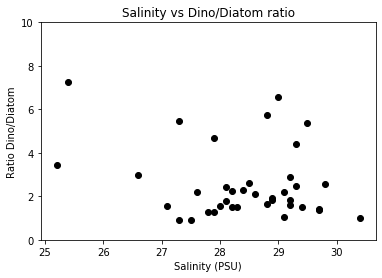

In [28]:
#Plot a scatter plot showing relationship between Salinity and the dino/diatom ratio
plt.scatter(Alldata['Salinity (PSU)'],Alldata['Ratio'],color = 'k')
plt.xlabel('Salinity (PSU)')
plt.ylabel('Ratio Dino/Diatom')
plt.ylim(0,10)
plt.title('Salinity vs Dino/Diatom ratio')

Text(0.5, 1.0, 'Temperature vs Dino/Diatom ratio')

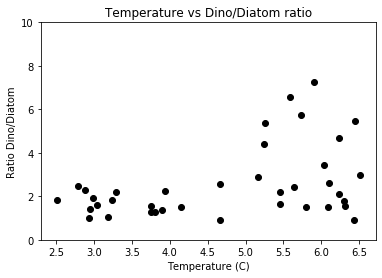

In [29]:
#Plot a scatter plot showing relationship between Temperature and the dino/diatom ratio
plt.scatter(Alldata['Temp(C)'],Alldata['Ratio'],color = 'k')
plt.xlabel('Temperature (C)')
plt.ylabel('Ratio Dino/Diatom')
plt.ylim(0,10)
plt.title('Temperature vs Dino/Diatom ratio')

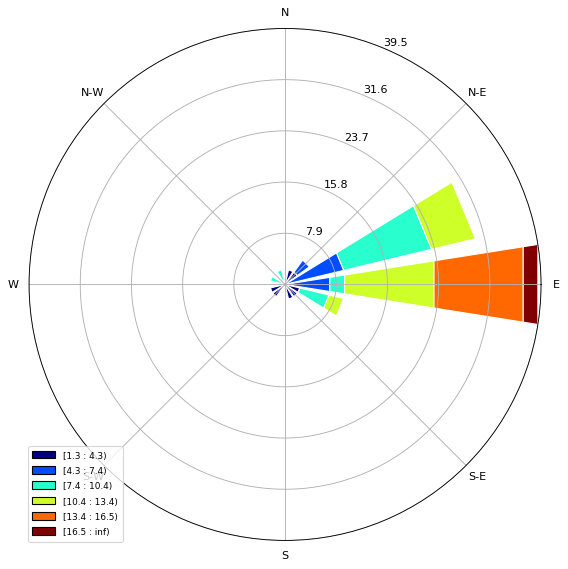

In [30]:
#Create a windrose plot, to visualize the windspeed occurence and wind direction
wd = Alldata['WDIR']
ws = Alldata['WSPD']
ax = WindroseAxes.from_ax()
ax.bar(wd,ws , normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
